In [81]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

In [80]:
!pip install shap

     |████████████████████████████████| 371 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509239 sha256=b4d9dd2903d709ec8c66175075b65ad38b98c373fcd07c53dd46b760ec36617a
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [6]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')
print(data.head())

     ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]


In [7]:
print(data.shape)

(2240, 29)


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
print(data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [14]:
print(data.isna())

         ID  Year_Birth  Education  ...  Z_CostContact  Z_Revenue  Response
0     False       False      False  ...          False      False     False
1     False       False      False  ...          False      False     False
2     False       False      False  ...          False      False     False
3     False       False      False  ...          False      False     False
4     False       False      False  ...          False      False     False
...     ...         ...        ...  ...            ...        ...       ...
2235  False       False      False  ...          False      False     False
2236  False       False      False  ...          False      False     False
2237  False       False      False  ...          False      False     False
2238  False       False      False  ...          False      False     False
2239  False       False      False  ...          False      False     False

[2240 rows x 29 columns]


In [18]:
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [19]:
data.interpolate(method = 'linear',limit_direction = 'forward')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [20]:
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [22]:
corr = data.corr(method = 'spearman')

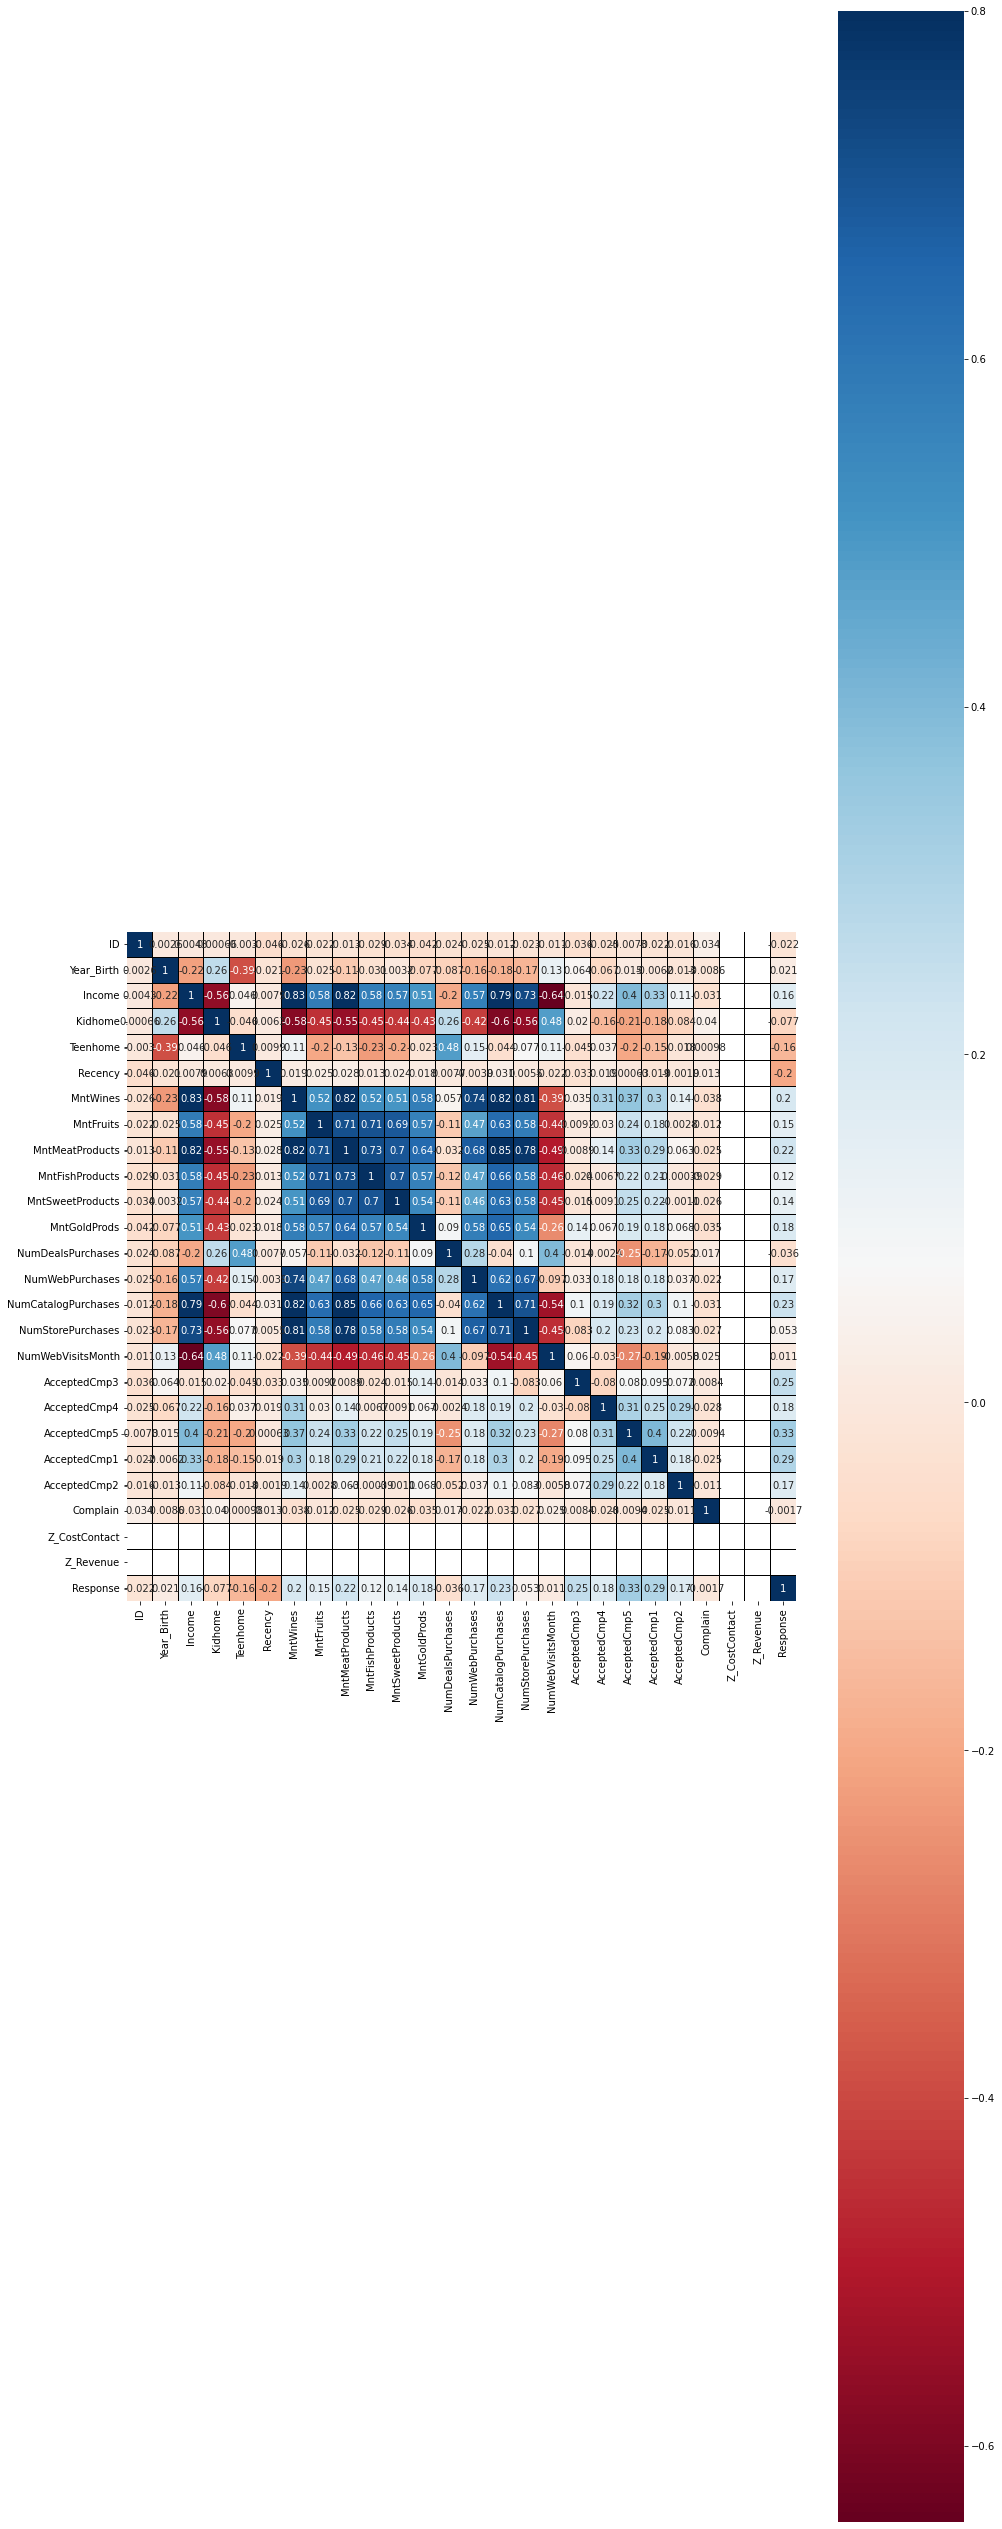

In [23]:
plt.figure(figsize = (15,55))
sns.heatmap(corr,vmax = 0.8,linewidths = 0.01,square = True,annot = True,cmap = 'RdBu',linecolor = 'black')

From the heatmap, it is visible that the features having maximum influence on response include Income, MntFruits, MntMeatProductes, MntGoldProducts,NumWebPurchases,NumCatalogPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4 and AcceptedCmp5.

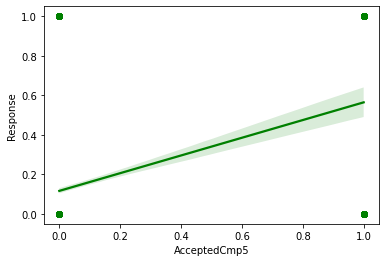

In [24]:
sns.regplot(x = data.AcceptedCmp5,y = data.Response,color = 'g')

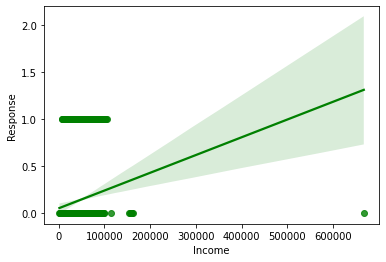

In [25]:
sns.regplot(x = data.Income,y = data.Response,color = 'g')

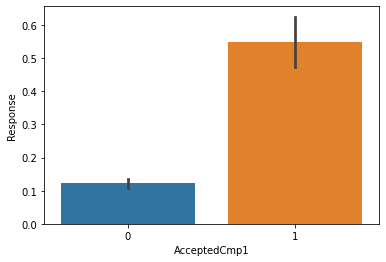

In [26]:
sns.barplot(x = data.AcceptedCmp1,y = data.Response)

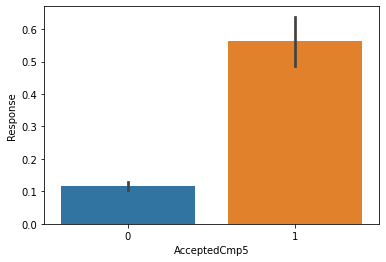

In [27]:
sns.barplot(x = data.AcceptedCmp5, y = data.Response)

In [44]:
data_1 = data.copy()
print(data_1.head())
print(data.head())

     ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]
     ID  Year_Birth   Education  ... Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation  ...             3         11         1
1  2174        1954  Graduation  ...             3         11         0
2  4141        1965  Graduation  ...             3         11         0
3  6182        1984  Graduation  ...             3         11         0
4  5324        1981         PhD  ...             3         11         0

[5 rows x 29 columns]


In [45]:
data_1.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer','Income'],axis = 1,inplace = True)
print(data_1.head())

   Kidhome  Teenhome  Recency  ...  Z_CostContact  Z_Revenue  Response
0        0         0       58  ...              3         11         1
1        1         1       38  ...              3         11         0
2        0         0       26  ...              3         11         0
3        1         0       26  ...              3         11         0
4        1         0       94  ...              3         11         0

[5 rows x 23 columns]


In [46]:
scaler = StandardScaler()

In [48]:
scaled_data_1 = scaler.fit_transform(data_1)
print(scaled_data_1)

[[-0.82521765 -0.92989438  0.30703926 ...  0.          0.
   2.38884634]
 [ 1.03255877  0.90693402 -0.38366418 ...  0.          0.
  -0.41861211]
 [-0.82521765 -0.92989438 -0.79808624 ...  0.          0.
  -0.41861211]
 ...
 [-0.82521765 -0.92989438  1.44669994 ...  0.          0.
  -0.41861211]
 [-0.82521765  0.90693402 -1.41971934 ...  0.          0.
  -0.41861211]
 [ 1.03255877  0.90693402 -0.31459383 ...  0.          0.
   2.38884634]]


In [61]:
k_means_fit = KMeans(n_clusters=2,random_state=42,n_init=20,max_iter=600).fit(scaled_data_1)

In [62]:
print(k_means_fit.labels_)

[0 1 0 ... 0 0 1]


In [63]:
pred_1 = k_means_fit.predict(scaled_data_1)
print(pred_1)

[0 1 0 ... 0 0 1]


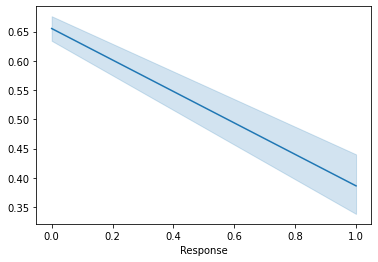

In [64]:
sns.lineplot(x = data.Response,y = pred_1)

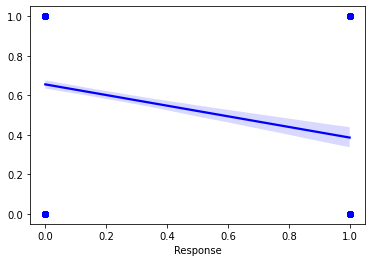

In [65]:
sns.regplot(x = data.Response,y = pred_1,color = 'b')

Looking from the regression curve of actual response vs predicted response, it is clear that the predictions are highly correlated with actual values for '0' class, but is having less correlation for '1' class. This is due to presence of data in response being biased towards '0' class, due to which model learns the '0' class predictions better.

In [67]:
y = data['Response'].copy()
print(y)

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64


In [74]:
x = data.drop(['ID','Year_Birth','Education','Marital_Status','Dt_Customer','Response'],axis = 1).copy()
print(x)

       Income  Kidhome  Teenhome  ...  Complain  Z_CostContact  Z_Revenue
0     58138.0        0         0  ...         0              3         11
1     46344.0        1         1  ...         0              3         11
2     71613.0        0         0  ...         0              3         11
3     26646.0        1         0  ...         0              3         11
4     58293.0        1         0  ...         0              3         11
...       ...      ...       ...  ...       ...            ...        ...
2235  61223.0        0         1  ...         0              3         11
2236  64014.0        2         1  ...         0              3         11
2237  56981.0        0         0  ...         0              3         11
2238  69245.0        0         1  ...         0              3         11
2239  52869.0        1         1  ...         0              3         11

[2240 rows x 23 columns]


In [75]:
seed = 42
test_size = 0.20
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = test_size,random_state = seed)

In [76]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
pred_11 = model.predict(x_test)
predictions = [np.round(value) for value in pred_11]
print(predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [79]:
print(accuracy_score(y_test,predictions))

0.8660714285714286


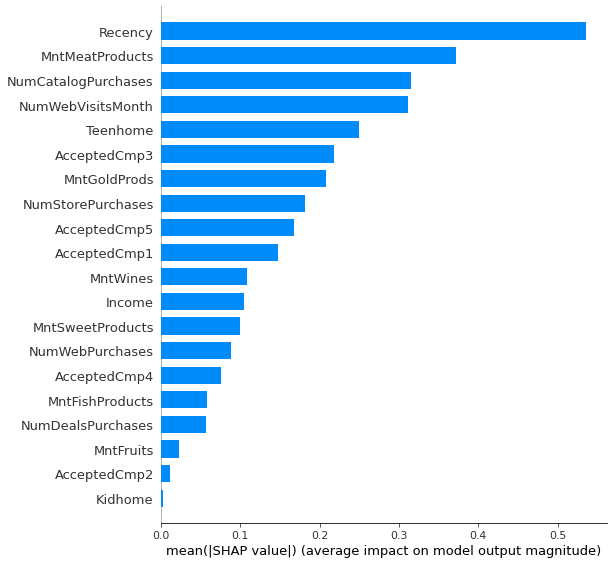

In [82]:
shap_values = shap.TreeExplainer(model).shap_values(x_train)
shap.summary_plot(shap_values,x_train,plot_type = 'bar')

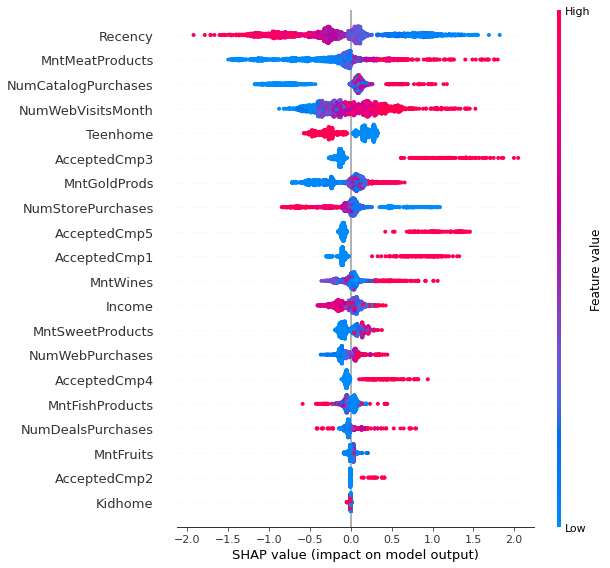

In [83]:
shap.summary_plot(shap_values,x_train)

Based upon the SHAP analysis, it is clearly visible that the features Recency, MntMeatProducts, NumCatalogPurchases and NumWebVisitsMonth have the maximum influence on the output of the model. Hence, in order to increase the worth of marketing campaign so as to increase customer strength, it is advisable to specifically focus on improving the performance of the above-mentioned features. 